In [19]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [20]:
alles = pd.read_csv("in/KM_MT.dat", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")
alles["U"] = alles["U"]/1000
alles
II = 0.36 # discharge and charge current

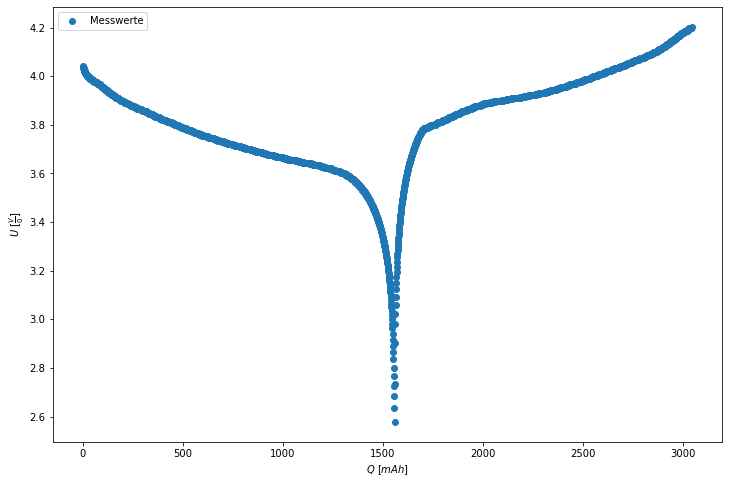

In [21]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(alles["t"], alles["U"], 'o', label="Messwerte")
ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$\frac{V}{0}$]")
ax.legend()
fig.savefig("out/alles.jpg")

plt.show()

In [22]:
dch = pd.read_csv("in/KM_MT.001", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")
dch["U"] = dch["U"]/1000
dch["Q"] = dch["t"] * II / 3600 * 1000 # mAh 

In [23]:
# moj sposob
dU = []
dt = []

energy_discharge = 0

for i in range(0, len(dch["U"])-1):
    dU.append((dch["U"][i+1]+dch["U"][i])/2)
    dt.append((dch["t"][i+1]-dch["t"][i]))

for i in range(0, len(dU)):
    energy_discharge += dU[i]*dt[i]*II

energy_discharge

2079.976860000042

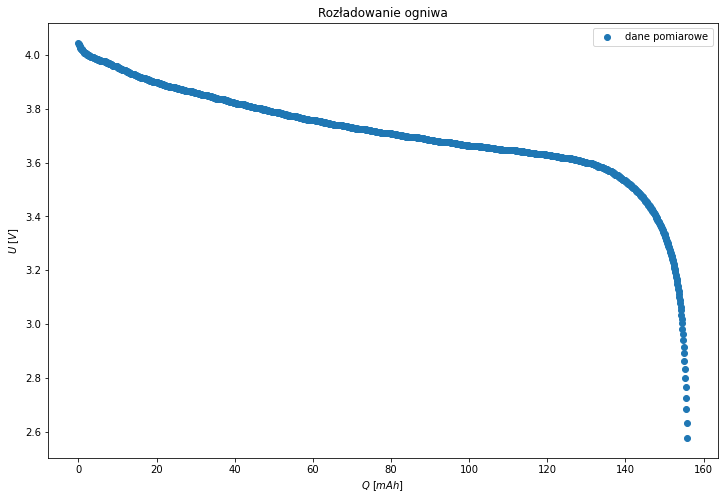

In [24]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(dch["Q"], dch["U"], 'o', label="dane pomiarowe")
ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$V$]")
ax.set_title("Rozładowanie ogniwa")
ax.legend(loc=1)
fig.savefig("out/dch.jpg")

plt.show()

In [25]:
ch = pd.read_csv("in/KM_MT.003", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")

ch["t0"] = ch["t"] - ch["t"][0]

ch["U"] = ch["U"]/1000
ch["Q"] = ch["t0"] * II / 3600 * 1000 # mAh 

dU = []
dt = []

energy_charge = 0

for i in range(0, len(ch["U"])-1):
    dU.append((ch["U"][i+1]+ch["U"][i])/2)
    dt.append((ch["t"][i+1]-ch["t"][i]))



for i in range(0, len(dU)):
    energy_charge += dU[i]*dt[i]*II

energy_charge


2098.346040000027

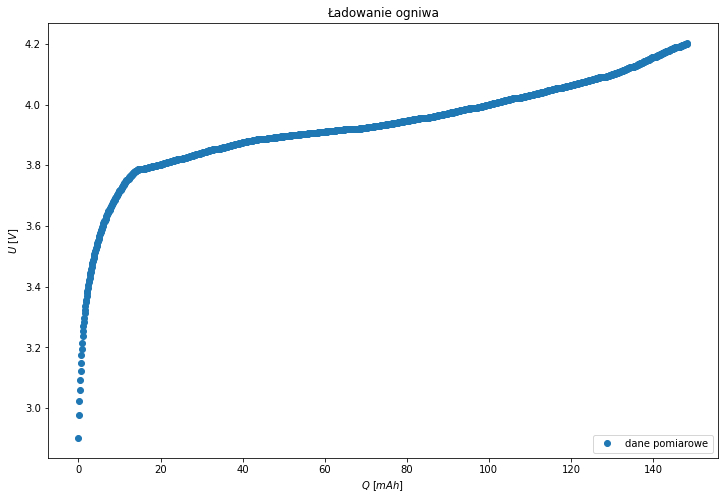

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(ch["Q"], ch["U"], 'o', label="dane pomiarowe")
ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$V$]")
ax.set_title("Ładowanie ogniwa")
ax.legend(loc=4)
fig.savefig("out/ch.jpg")

plt.show()

In [27]:
# efficiency
eta = energy_discharge/energy_charge
eta

0.9912458766810526